### Logistic Regression

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
# Open the .csv files
X_train = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Embeddings/train_word2vec.csv')
X_test = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Embeddings/test_word2vec.csv')

X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = X_test.drop(['Unnamed: 0'], axis=1)

# Check the shape of the data
print(X_train.shape)
print(X_test.shape)

(22500, 512)
(7500, 512)


In [13]:
# Extract the features into a numpy array
X_train = X_train.values
X_test = X_test.values

In [14]:
# Open the labels
y_train_df = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Data/Preprocessed-Data/train_labels.csv')
y_test_df = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Data/Preprocessed-Data/test_labels.csv')

# Check the shape of the labels
print(y_train_df.shape)
print(y_test_df.shape)

(22500, 1)
(7500, 1)


In [15]:
# Convert class to non_suicide = 0 and suicide = 1
y_train_temp = y_train_df['class'].values
y_test_temp = y_test_df['class'].values

# Check the shape of the labels
print(y_train_temp.shape)
print(y_test_temp.shape)

(22500,)
(7500,)


In [16]:
# Making the Labels Numeric
y_train = np.array([0 if label == "non-suicide" else 1 for label in y_train_temp])
y_test = np.array([0 if label == "non-suicide" else 1 for label in y_test_temp])

# Check the shape of the labels
print(y_train.shape)
print(y_test.shape)


(22500,)
(7500,)


In [17]:
# Standard Preprocessing
# Check the mean and standard deviation of the data
print(np.mean(X_train), np.std(X_train))

0.0029877624999040935 0.18965241040518302


### Without Hyperparameter Tuning

In [18]:
# Logistic Regression
lr_base = LogisticRegression()

# Fit
lr_base.fit(X_train, y_train)

# Predict
y_pred = lr_base.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Print the accuracy
print("Base Logistic Regression: Test Data")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

# Calculate macro F1 Score
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Print Macro F1 Score
print(f'Macro F1 Score: {macro_f1}')

Base Logistic Regression: Test Data
Accuracy: 0.8982666666666667
Confusion Matrix:
[[3245  463]
 [ 300 3492]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.89      3708
           1       0.88      0.92      0.90      3792

    accuracy                           0.90      7500
   macro avg       0.90      0.90      0.90      7500
weighted avg       0.90      0.90      0.90      7500

AUC Score: 0.8980104597654063
Weighted F1-score: 0.8981937718582631
Macro F1 Score: 0.8981562064355275


In [20]:
# Predict on training data
y_pred_train = lr_base.predict(X_train)

# Print the accuracy
print("Base Logistic Regression: Training Data")
print("Accuracy:", accuracy_score(y_train, y_pred_train))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

# Print the classification report
print("Classification Report:")
print(classification_report(y_train, y_pred_train))

# Print AUC score
print("AUC Score:", roc_auc_score(y_train, y_pred_train))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_train, y_pred_train, average='weighted'))

Base Logistic Regression: Training Data
Accuracy: 0.8900888888888889
Confusion Matrix:
[[ 9876  1416]
 [ 1057 10151]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     11292
           1       0.88      0.91      0.89     11208

    accuracy                           0.89     22500
   macro avg       0.89      0.89      0.89     22500
weighted avg       0.89      0.89      0.89     22500

AUC Score: 0.8901469251885513
Weighted F1-score: 0.8900674516629439


In [21]:
# Perform Grid Search to find the best parameters for Logistic Regression

# Define hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

# Initialize Logistic Regression
clf = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.3s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.3s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.3s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.3s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.3s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.3s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.3s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.4s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.2s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   4.0s
[CV] END ...............C=0.01, penalty=l1, sol

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 4.3min
[CV] END .......................C=1, penalty=l1, solver=saga; total time= 4.3min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 4.3min
[CV] END .................C=10, penalty=l1, solver=liblinear; total time= 1.5min
[CV] END .................C=10, penalty=l1, solver=liblinear; total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 4.3min
[CV] END .................C=10, penalty=l1, solver=liblinear; total time= 1.6min
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 4.5min
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   9.3s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   9.7s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  10.7s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=  10.7s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  12.9s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  15.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  14.1s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time= 2.0min
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  14.4s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  15.4s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=  18.5s
[CV] END .................C=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 2.5min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time= 5.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 2.5min
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.1s
[CV] END ......................C=10, penalty=l1, solver=saga; total time= 5.0min
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.1s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 2.5min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time= 5.0min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time= 5.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time= 5.4min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 3.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 3.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time= 5.3min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time= 5.2min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time= 5.3min
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=  33.6s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=  32.5s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=  34.1s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=  36.3s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=  33.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=  25.0s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time= 6.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=  28.0s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=  29.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=  30.3s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=  29.9s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=  51.9s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=  56.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=14.6min
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=14.5min
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=14.8min
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=  56.7s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=  55.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=  46.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time= 6.5min
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=15.1min
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=15.7min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 2.6min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 2.4min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 2.3min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 2.2min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Fra

[CV] END .....................C=100, penalty=l2, solver=saga; total time= 2.1min


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             verbose=2)

In [22]:
# Best hyperparameters
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [23]:
# Best Model
lr_best = LogisticRegression(max_iter=1000, C=best_parameters['C'], penalty=best_parameters['penalty'], solver=best_parameters['solver'])

# Fit the best model    
lr_best.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_test_best = lr_best.predict(X_test)

In [33]:
# Print the accuracy
print("Best Logistic Regression: Test Data")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

# Print macro F1-score
print("Macro F1-score:", f1_score(y_test, y_pred, average='macro'))

Best Logistic Regression: Test Data
Accuracy: 0.8982666666666667
Confusion Matrix:
[[3245  463]
 [ 300 3492]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.89      3708
           1       0.88      0.92      0.90      3792

    accuracy                           0.90      7500
   macro avg       0.90      0.90      0.90      7500
weighted avg       0.90      0.90      0.90      7500

AUC Score: 0.8980104597654063
Weighted F1-score: 0.8981937718582631
Macro F1-score: 0.8981562064355275


In [34]:
# Training Data
# Predict the labels of the training set
y_pred_train_best = lr_best.predict(X_train)

# Print the accuracy
print("Best Logistic Regression: Training Data")
print("Accuracy:", accuracy_score(y_train, y_pred_train_best))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train_best))

# Print the classification report
print("Classification Report:")
print(classification_report(y_train, y_pred_train_best))

# Print AUC score
print("AUC Score:", roc_auc_score(y_train, y_pred_train_best))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_train, y_pred_train_best, average='weighted'))

Best Logistic Regression: Training Data
Accuracy: 0.9008888888888889
Confusion Matrix:
[[10016  1276]
 [  954 10254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11292
           1       0.89      0.91      0.90     11208

    accuracy                           0.90     22500
   macro avg       0.90      0.90      0.90     22500
weighted avg       0.90      0.90      0.90     22500

AUC Score: 0.9009409363738212
Weighted F1-score: 0.9008738837944499


### Principal Component Analysis

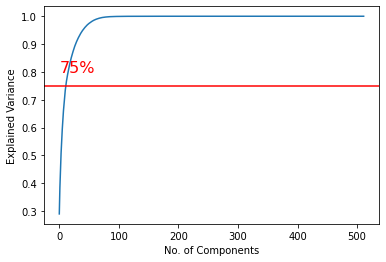

In [26]:
# Plot No. of Components vs. Explained Variance and mark at 75% explained variance
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.text(0.5, 0.8, '75%', color = 'red', fontsize=16)
plt.show()

In [27]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance >= 0.75) + 1
print("No. of Components:", n_components)

No. of Components: 13


In [28]:
# Perform PCA on the data and extract the features that explain 75% of the variance
pca = PCA(n_components=0.75)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
print(X_train_pca.shape)

(22500, 13)


In [30]:
# Run Logistic Regression 
# Initialize Logistic Regression
lr_pca = LogisticRegression(max_iter=1000, C=best_parameters['C'], penalty=best_parameters['penalty'], solver=best_parameters['solver'])

# Fit the model on the training data
lr_pca.fit(X_train_pca, y_train)

# Predict on the test data
y_pred_test_pca = lr_pca.predict(X_test_pca)

In [31]:
# Print the accuracy score
print("Logistic Regression with PCA: Test Data")
print("Accuracy Score:", accuracy_score(y_test, y_pred_test_pca))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_pca))

# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred_test_pca))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_pca))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_test, y_pred_test_pca, average='weighted'))

Logistic Regression with PCA: Test Data
Accuracy Score: 0.8813333333333333
Confusion Matrix:
 [[3165  543]
 [ 347 3445]]
AUC Score: 0.8810257158657981
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88      3708
           1       0.86      0.91      0.89      3792

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500

Weighted F1-score: 0.8812173952673593


In [32]:
# Training Data
# Predict on the training data
y_pred_train_pca = lr_pca.predict(X_train_pca)

# Print the accuracy score
print("Logistic Regression with PCA: Training Data")
print("Accuracy Score:", accuracy_score(y_train, y_pred_train_pca))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train_pca))

# Print AUC score
print("AUC Score:", roc_auc_score(y_train, y_pred_train_pca))

# Print the classification report
print("Classification Report:\n", classification_report(y_train, y_pred_train_pca))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_train, y_pred_train_pca, average='weighted'))

Logistic Regression with PCA: Training Data
Accuracy Score: 0.8755111111111111
Confusion Matrix:
 [[ 9693  1599]
 [ 1202 10006]]
AUC Score: 0.8755752494991812
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87     11292
           1       0.86      0.89      0.88     11208

    accuracy                           0.88     22500
   macro avg       0.88      0.88      0.88     22500
weighted avg       0.88      0.88      0.88     22500

Weighted F1-score: 0.8754805489225298
